In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size':12})

In [26]:
n = 101
psi = np.zeros((n,n))# board plate
C = 100 # total current
l = 1 # length
dx = 1/(n-1)
x = np.linspace(0,1,n)
print("dx = %.2f"% dx)
print(x)


dx = 0.01
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [27]:
for i in range(len(psi)):
    psi[i,0] = C
    psi[i,-1] = 100*(x[i]-1) + C
    psi[0,i] = C - 100*x[i]
    psi[-1,i] = C
    

In [15]:
# wrong order
for i in range(len(psi)):
    psi[i,-1] = C
    psi[-1,i] = 100*(x[i]-1) + C
    psi[i, 1] = C - 100*x[i]
    psi[0, i] = C

C:\Users\Meng Yang\AppData\Local\Temp\ipykernel_20876\747147271.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


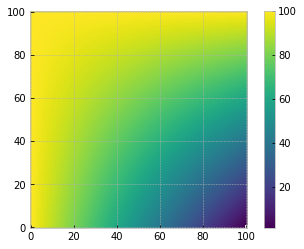

In [31]:
plt.imshow(np.where(psi>0, psi, np.nan), origin='lower')
plt.colorbar()
plt.show()

In [66]:
a = 1.
b = 1.
c = 1.
d = 1.
e = -4.
f = 0.
w = 1.7

resid_crit = 1.0e-6
resid_ave = 100.
count = 0

while resid_ave > resid_crit:
    resid_ave = 0
    cnt_points = 0
    for i in range(1,n-1):
        for j in range(1,n-1):
            if ((i+j)%2)==count%2:#checker-boarding operation;
                residual = a * psi[i+1, j] + b*psi[i-1,j] + c * psi[i,j+1] + d*psi[i,j-1]+ e* psi[i,j] - f
                psi[i,j] += -w*residual/e
                resid_ave += abs(residual)
                cnt_points += 1
    resid_ave = resid_ave / cnt_points
    if count%1000==0:
        print("residual:%.7f" % resid_ave)
    count = count + 1
print("\n")
print("SOR conducted a total of %g iterations to obtain approximate solution." % count)
print("Final residual:%.7f"% resid_ave)

residual:3.0605999
residual:0.0400534
residual:0.0023906
residual:0.0001427
residual:0.0000085


SOR conducted a total of 4761 iterations to obtain approximate solution.
Final residual:0.0000010


C:\Users\Meng Yang\AppData\Local\Temp\ipykernel_20876\2494151585.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label="$\psi(x,y)$")


<function matplotlib.pyplot.show(close=None, block=None)>

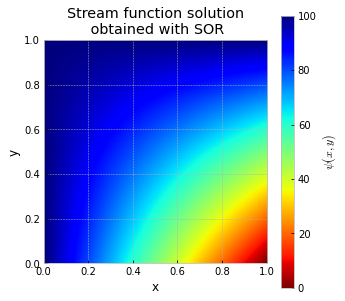

In [30]:
from traitlets.config.configurable import LoggingConfigurable
plt.figure(figsize=(5,5))
plt.imshow(psi,origin="lower", extent=[0,1,0,1], cmap = "jet_r")
plt.colorbar(label="$\psi(x,y)$")
plt.title("Stream function solution\n obtained with SOR")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect("equal")
plt.show

In [8]:
fx = np.zeros((n,n))
fy = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if (i>1 and i< n-1):
            fy[i,j] = -(psi[i+1,j] - psi[i-1,j])/2.0*dx
        elif (i>=1):
            fy[i,j] = -(psi[i,j] - psi[i-1,j])/dx
        else:
            fy[i,j] = -(psi[i+1,j] - psi[i,j])/dx
        
        if (j>=1 and j< n-1):
            fx[i,j] = (psi[i,j+1] - psi[i,j-1])/(2.0*dx)
        elif (j>=1):
            fx[i,j] = (psi[i,j] - psi[i,j-1])/dx
        else:
            fx[i,j] = (psi[i,j+1] - psi[i,j])/dx

C:\Users\Meng Yang\AppData\Local\Temp\ipykernel_20876\3746930560.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label="$\psi(x,y)$")


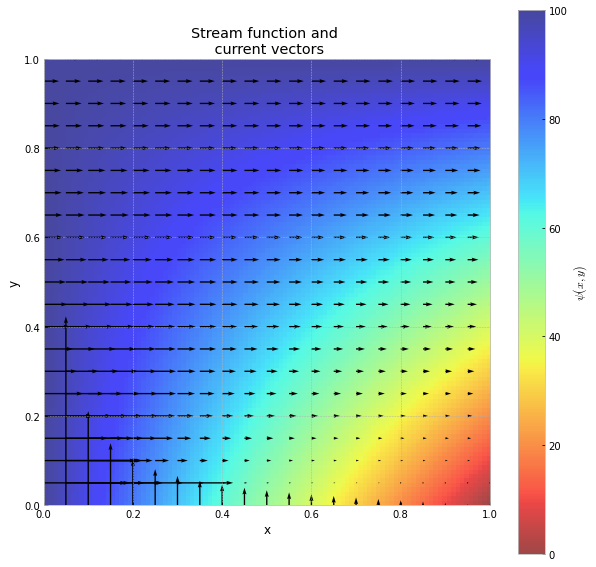

In [34]:

x = np.linspace(0,1,n)
X,Y = np.meshgrid(x,x)
plt.figure(figsize=(10,10))
plt.imshow(psi, origin='lower', extent=[0,1,0,1], cmap='jet_r', alpha=0.7)
plt.colorbar(label="$\psi(x,y)$")
plt.quiver(X[::5,::5],Y[::5,::5],np.rot90(-fx[::5,::5],2), np.rot90(-fy[::5,::5],2),
            scale = 3000, width=0.003)
plt.title("Stream function and \n current vectors")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect("equal")
plt.show()

## 雅可比迭代
$
{10{x_1} - 2{x_2} - {x_3} = 3} 左留x_1\\ 
{ - 2{x_1} + 10{x_2} - {x_3} = 15}左留x_2\\
{ - 1{x_1} - 2{x_2} + 5{x_3} = 10}左留x_3\\
$
$
{x_1^{k + 1} = 0.2x_2^k + 0.1x_3^k + 0.3}\\
{x_2^{k + 1} = 0.2x_1^k + 0.1x_3^k + 1.5}\\
{x_3^{k + 1} = 0.2x_1^k + 0.4x_2^k + 2}
$

$取x^{0}=(0,0,0)^{T}$带入上式
得到第二次迭代结果

将系数矩阵分解成A=D-L-U

D：对角线元素

-L：下三角减去对角线元素

-U：上三角减去对角线元素

$
x = {D^{ - 1}}\left( {L + U} \right)x + {D^{ - 1}}b = Bx + f 
\\$
$x^{(k + 1)} = B{x^{(k)}} + f(k = 0,1,2...)\\$
${x_i}^{(k + 1)} = \frac{{{b_i} - \sum\limits_{j = 1}^{i - 1} {{a_{ij}}{x_j}}  - \sum\limits_{j = i + 1}^n {{a_{ij}}x_j^{(k)}} }}{{{a_{ii}}}};i = 1,2...n$


## 高斯赛德尔迭代
$
{10{x_1} - 2{x_2} - {x_3} = 3} 左留x_1\\ 
{ - 2{x_1} + 10{x_2} - {x_3} = 15}左留x_2\\
{ - 1{x_1} - 2{x_2} + 5{x_3} = 10}左留x_3\\
$
$
{x_1^{k + 1} = 0.2x_2^k + 0.1x_3^k + 0.3}\\
{x_2^{k + 1} = 0.2x_1^{k+1} + 0.1x_3^k + 1.5}\\
{x_3^{k + 1} = 0.2x_1^{k+1} + 0.4x_2^{k+1} + 2}
$

## 超松弛迭代
$
Ax = b\\
分解A=I-B\\
x=Bx+b \\
x^{k+1} = Bx^{k} + b\\
x^{k+1} = (I-A)x^{k} + b\\
x^{k+1} = x^{k} + b - Ax^{k}\\
x^{k+1} = x^{k} + r^{k}\\
r^{k}剩余向量，每一步变化的量\\
第k次近似由k+1次加上剩余向量r^{k}而得到\\
给r^{k}乘一个适当的因子\omega 得到加速迭代公式\\
x^{k+1} = x^{k} + \omega(b - Ax^{k})\\
此方法为同时迭代法\\
$
$
x_i^{(k + 1)} = x_i^{(k)} + \omega \left( {{b_i} - \sum\limits_{j = i}^n {{a_{ij}}x_j^{(k)}} } \right)
$


$
充分利用最新计算出的分量信息，利用上述加速收敛思想，得到逐次超松弛迭代法SOR\\
在高斯迭代圆括号前加w；得到SOR法\\
x_i^{(k + 1)} = x_i^{(k)} + \frac{\omega }{{{a_{ii}}}}\left( {{b_i} - \sum\limits_{j = i}^{i - 1} {{a_{ij}}x_j^{(k)}}  - \sum\limits_{j = i}^n {{a_{ij}}x_j^{(k)}} } \right)(i = 1,2...n;k = 0,1,2...)
$

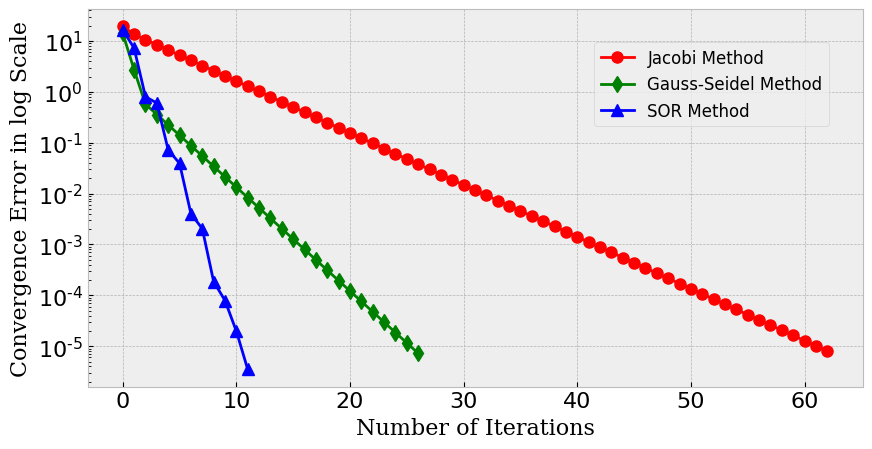

Complete!


In [48]:
#  Solves linear equation systems such as Ax=b using
#   1. Jacobi Method
#   2. Gauss-Seidel Method Method
#   3. SOR Successive Over-Relaxation Method

import math
import matplotlib.pyplot as plt
import numpy as np
  
 
def solver(A, Xstar, b, flag, omg=1, max_iter=100, max_tol=10e-6):
  
    err = []
    D = np.diag(np.diag(A))
    L = -np.tril(A, -1)
    U = -np.triu(A, 1)
  
    if   (flag==1):
  
        B = np.mat( np.linalg.inv( D ) ) * np.mat( L + U )
        f = np.mat( np.linalg.inv( D ) ) * np.mat(b)
  
    elif (flag==2):
          
        omg = 1
        B = np.mat( np.linalg.inv( D - omg * L ) )* np.mat( ((1 - omg) * D + omg * U) )
        f = omg * np.mat(np.linalg.inv( D - omg * L )) * np.mat(b)
  
    elif (flag==3):    
  
        B = np.mat( np.linalg.inv( D - omg * L ) )* np.mat( ((1 - omg) * D + omg * U) )
        f = omg * np.mat(np.linalg.inv( D - omg * L )) * np.mat(b)
  
  
    for i in range(max_iter):
          
        Xnew = B*Xstar + f
        err.append( np.linalg.norm( Xnew - Xstar, ord=1) )
        Xstar = Xnew
        if (err[i] <= max_tol):
            break
  
    return Xnew, err
 
if __name__ == '__main__':
    A = np.matrix([[4, 3, 0], [3, 4, -1],[0, -1, 4]])
     
    b = np.matrix([24, 30, -24]).transpose()
     
    omg  = 1.25                 # relaxation factor
    max_iter = 1000             # maximum number of iteration
    max_tol = 10e-6             # maximum tolerance of convergence error
     
    Xstar = np.zeros_like(b)    # initial assumption of solution vector
     
 
    Xnew1, err1 = solver(A, Xstar, b, 1, 1, max_iter, max_tol)
    Xnew2, err2 = solver(A, Xstar, b, 2, 1, max_iter, max_tol)
    Xnew3, err3 = solver(A, Xstar, b, 3, 1.25, max_iter, max_tol)
     
    # plot figure
    plt.style.use('bmh')
    fig, ax1 = plt.subplots(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
    plt.tick_params(labelsize = 16)
     
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 16,        }
     
    ax1.plot(err1, 'r', marker='o', markersize=8, label = 'Jacobi Method')
    ax1.plot(err2, 'g', marker='d', markersize=8, label = 'Gauss-Seidel Method')
    ax1.plot(err3, 'b', marker='^', markersize=8, label = 'SOR Method')
     
    ax1.grid(True)
    ax1.set_yscale('log')
    ax1.set_xlabel('Number of Iterations', fontdict=font)
    ax1.set_ylabel('Convergence Error in log Scale', fontdict=font)
     
    plt.legend( borderaxespad= 2)
     
    plt.show()
    print ('Complete!')

dx = 0.01


C:\Users\Meng Yang\AppData\Local\Temp\ipykernel_20876\1297847657.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


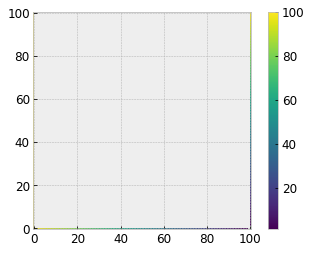

In [36]:
# SOR solving exercise
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size':12})
n = 101
psi = np.zeros((n,n))# board plate
C = 100 # total current
l = 1 # length
dx = 1/(n-1)
x = np.linspace(0,1,n)
print("dx = %.2f"% dx)

for i in range(len(psi)):
    psi[i,0] = C
    psi[i,-1] = 100*(x[i]-1) + C
    psi[0,i] = C - 100*x[i]
    psi[-1,i] = C

plt.imshow(np.where(psi>0, psi, np.nan), origin='lower')
plt.colorbar()
plt.show()

a = 1.
b = 1.
c = 1.
d = 1.
e = -4.
f = 0.
w = 1.7

resid_crit = 1.0e-6
resid_ave = 100.
count = 0




In [63]:
D = np.diag(-4 * np.ones(len(psi)**2))
D_1 = np.diag(np.ones(len(psi)**2-1), -1) + np.diag(np.ones(len(psi)**2-1), 1)
D_2 = np.diag(np.ones(len(psi)**2- len(psi)), -len(psi)) + np.diag(np.ones(len(psi)**2- len(psi)), len(psi))
A = D + D_1 + D_2
A
#b
b = np.mat(np.ones(len(psi)**2)).transpose()

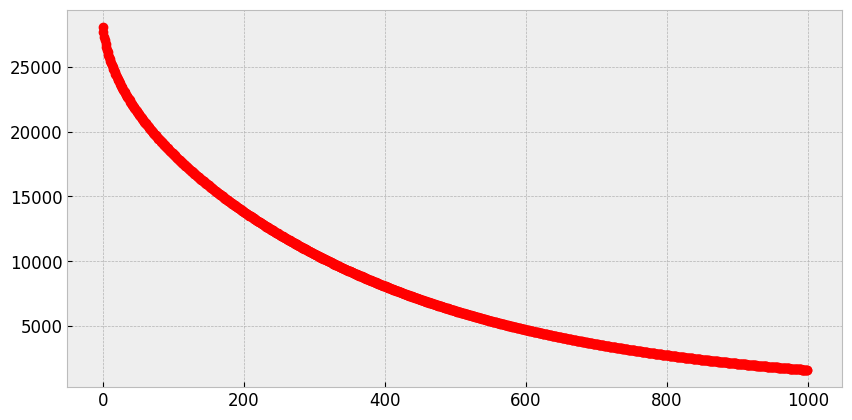

In [65]:
max_iter = 1000
max_tol = 10e-6  
Xstar = np.zeros_like(b) 
Xnew4, err4 = solver(A, Xstar, b, 3, 1.7, max_iter, max_tol)

fig, ax1 = plt.subplots(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
ax1.plot(err4, 'r', marker='o', markersize=6, label = 'SOR in exercise')